In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [60]:
%%html
<strong><h3>1.Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище.

In [36]:
df = pd.DataFrame({
    "English":[71.3, 89.3, 95.2, 72.6, 73.6, 88.6, 93.5],
    "Reading":[83.8, 87.1, 76.7, 74.4, 79.2, 78.3, 85.4]
})

n = data.shape[0]
data

,English,Reading
0,71.3,83.8
1,89.3,87.1
2,95.2,76.7
3,72.6,74.4
4,73.6,79.2
5,88.6,78.3
6,93.5,85.4


In [63]:
%%html
<strong><h3>2.Побудувати графік, що відображає розкид даних в групах.

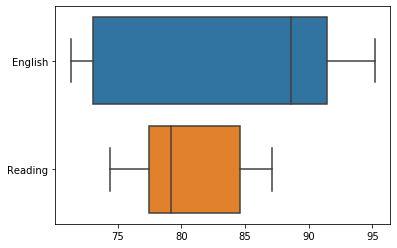

In [37]:
sns.boxplot(data = df, orient = 'h')

In [64]:
%%html
<strong><h3>3.Написати функції


In [65]:
%%html 
<strong><h3>4.Для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [58]:
def cor_pirson(x, y):
    n = len(x)
    r = (n * sum(x*y) - (sum(x) * sum(y)))/((n * sum(x**2) - sum(x)**2) * (n * sum(y**2) - sum(y)**2))**(1/2)
    df = n - 2
    a = pd.read_excel("Таблиця критичних значень кореляційного аналізу.xlsx").loc[df-1, 0.05]
    print("Коефіцієнта кореляції: ", r)
    print("Ступенів свободи критерію: ", df)
    significant = ("significant") if abs(r) > a else "not significant"
    print("Результат оцінки значимості зв'зку: ", significant)
    return r, df, significant


In [66]:
%%html 
<strong><h3>5.для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [71]:
def Student_criterion(x, y):
    d = x - y
    n = len(x)
    df = n - 1 
    Md = d.mean()
    sigma_d = d.std()
    t_emp = Md / sigma_d * n**(1/2)
    a = pd.read_excel("Таблица критических значений для парного критерия.xlsx").loc[df-1, 0.05]
    
    print("Значення t-критерію Стьюдента: ", t_emp)
    print("Число ступенів свободи: ", df)
    
    significant = "significant" if abs(t_emp) > a else "not significant"
    print("Результат оцінки значимості зв'зку: ", significant)
    return abs(t_emp), df, significant


In [68]:
%%html 
<strong><h3>6.Перевірити розбіжність на між групами на даних з п. 1.

In [59]:
cor_pirson(df["English"], df["Reading"])

Коефіцієнта кореляції:  0.2355482972973239
Ступенів свободи критерію:  5
Результат оцінки значимості зв'зку:  not significant


(0.2355482972973239, 5, 'not significant')

In [72]:
Student_criterion(df["English"], df["Reading"])

Значення t-критерію Стьюдента:  0.6935099618478149
Число ступенів свободи:  6
Результат оцінки значимості зв'зку:  not significant


(0.6935099618478149, 6, 'not significant')

In [69]:
%%html 
<strong><h3>7.Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

In [75]:
%%html
1)Відсутність статистичної залежності між групами.<div>
2)Значення коефіцієнту Стьюдента менше, ніж його критичне значення, було прийнято нульову гіпотезу про рівність середніх.